# 1. Import Library

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

# 資料預處理

In [ ]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [ ]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [ ]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

# 建立模型

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(128, activation='relu'))

In [ ]:
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(10,activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 36)          0         
                                                                 
 flatten (Flatten)           (None, 1764)              0

# 訓練模型

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [ ]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

Epoch 1/20
160/160 - 53s - loss: 0.4811 - accuracy: 0.8502 - val_loss: 0.0932 - val_accuracy: 0.9732 - 53s/epoch - 333ms/step
Epoch 2/20
160/160 - 52s - loss: 0.1309 - accuracy: 0.9601 - val_loss: 0.0615 - val_accuracy: 0.9815 - 52s/epoch - 326ms/step
Epoch 3/20
160/160 - 52s - loss: 0.0990 - accuracy: 0.9701 - val_loss: 0.0510 - val_accuracy: 0.9843 - 52s/epoch - 324ms/step
Epoch 4/20
160/160 - 52s - loss: 0.0808 - accuracy: 0.9756 - val_loss: 0.0463 - val_accuracy: 0.9859 - 52s/epoch - 324ms/step
Epoch 5/20
160/160 - 52s - loss: 0.0704 - accuracy: 0.9785 - val_loss: 0.0406 - val_accuracy: 0.9882 - 52s/epoch - 324ms/step
Epoch 6/20
160/160 - 52s - loss: 0.0591 - accuracy: 0.9825 - val_loss: 0.0380 - val_accuracy: 0.9892 - 52s/epoch - 326ms/step
Epoch 7/20
160/160 - 52s - loss: 0.0526 - accuracy: 0.9837 - val_loss: 0.0355 - val_accuracy: 0.9893 - 52s/epoch - 325ms/step
Epoch 8/20
160/160 - 52s - loss: 0.0465 - accuracy: 0.9857 - val_loss: 0.0369 - val_accuracy: 0.9895 - 52s/epoch - 325

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

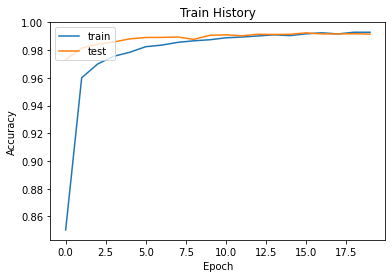

In [ ]:
show_train_history('accuracy','val_accuracy')

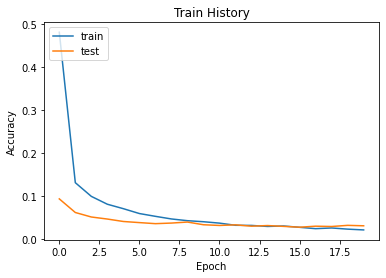

In [ ]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [ ]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

313/313 [==============================] - 4s 14ms/step - loss: 0.0215 - accuracy: 0.9931


0.9930999875068665

# 預測結果

In [ ]:
predict_x=model.predict(x_Test4D_normalize) 
prediction=np.argmax(predict_x,axis=1)
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

# 查看預測結果

In [ ]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

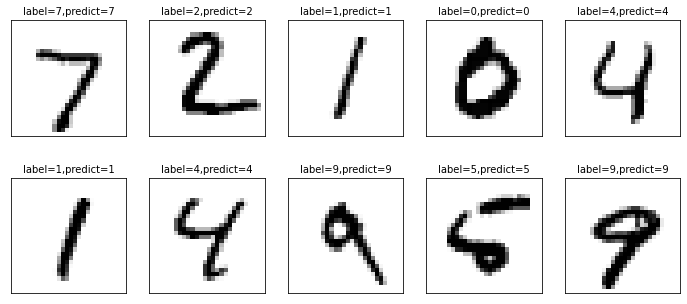

In [ ]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix

In [ ]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,978,0,0,0,0,0,1,1,0,0
1,0,1131,1,1,0,0,0,2,0,0
2,2,1,1026,0,0,0,0,3,0,0
3,0,0,1,1006,0,2,0,0,1,0
4,0,0,0,0,981,0,0,0,0,1
5,1,0,0,4,0,884,2,0,0,1
6,3,2,0,0,2,1,949,0,1,0
7,0,2,4,0,0,0,0,1020,1,1
8,1,0,2,2,1,1,0,3,961,3


In [ ]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [ ]:
df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
2035,5,3
2597,5,3
5937,5,3


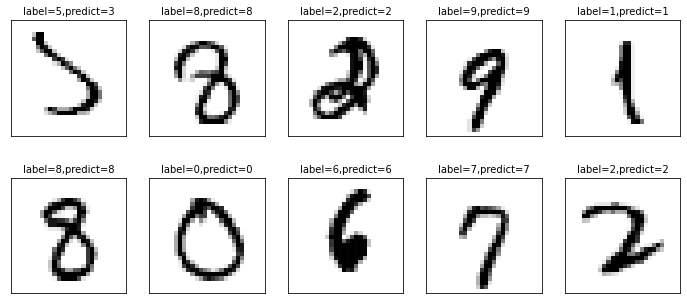

In [ ]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=1393)

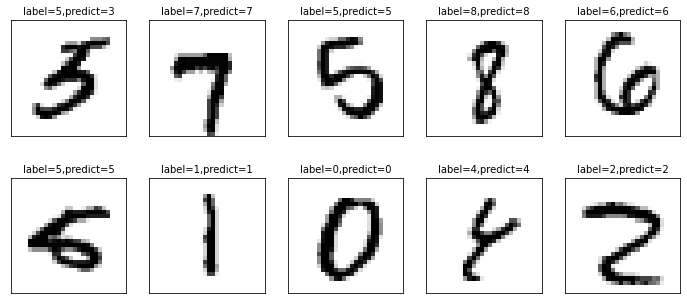

In [ ]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=2035)